In [329]:
import pandas as pd
from pathlib import Path

streams_features_file = r"/Users/James/Documents/Python/Machine Learning Projects/Spotify_Listening_Analysis/Spotify 2.0/preprocessing/pickles/my_features.pkl"
streams_features_raw = pd.read_pickle(streams_features_file)
streams_features = streams_features_raw.copy()


columns_to_drop = ["type", "id", "uri", "track_href", "analysis_url", "time_signature"]
streams_features.drop(columns_to_drop, inplace=True, axis=1)


def convert_duration(dataframe=streams_features):
    dataframe["duration"] = dataframe["duration_ms"].divide(60000)
    dataframe.drop("duration_ms", axis=1, inplace=True)
    return dataframe


def add_play_count(dataframe=streams_features):
    dataframe["playCount"] = dataframe["minutesTotal"] / dataframe["duration"]
    return dataframe


streams_features = convert_duration(streams_features)
streams_features = add_play_count(streams_features)

streams_features = streams_features[
    (streams_features["artistName"] != "John Mayer")
    & (streams_features["trackName"] != "On The Way Home")
]  # this one song has an incorrect duration and is returning a 30+ play count, definitely something not right


In [390]:
def plot_loss(model_history, exp = False):
    if exp:
        plt.plot(pd.DataFrame(np.exp(model_history.history["loss"])), label = "loss")
        plt.plot(pd.DataFrame(np.exp(model_history.history["val_loss"])), label = "val_loss")
    else:
        plt.plot(pd.DataFrame(model_history.history["loss"]), label = "loss")
        plt.plot(pd.DataFrame(model_history.history["val_loss"]), label = "val_loss")
    plt.grid(True)
    #plt.gca().set_ylim(0, 10)
    plt.xlabel("Epoch")
    plt.ylabel("Loss")
    plt.legend()
    plt.show()

In [391]:
def plot_hist(model):
    fig, ax = plt.subplots(figsize=(7,5));
    ax = sns.histplot(data = model, x = "playCount", stat = "count", kde = True)
    return ax

In [334]:
streams_features[streams_features["playCount"]==0].count()

artistName          182
trackName           182
minutesTotal        182
trackId             182
danceability        182
energy              182
key                 182
loudness            182
mode                182
speechiness         182
acousticness        182
instrumentalness    182
liveness            182
valence             182
tempo               182
duration            182
playCount           182
dtype: int64

In [335]:
streams_features.count()

artistName          8443
trackName           8443
minutesTotal        8443
trackId             8443
danceability        8443
energy              8443
key                 8443
loudness            8443
mode                8443
speechiness         8443
acousticness        8443
instrumentalness    8443
liveness            8443
valence             8443
tempo               8443
duration            8443
playCount           8443
dtype: int64

In [336]:
import seaborn as sns
import matplotlib.pyplot as plt

<AxesSubplot:xlabel='playCount', ylabel='Count'>

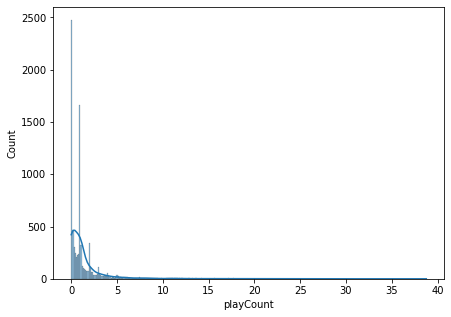

In [337]:
plot_hist(streams_features)

In [338]:
streams_features["playCount"].skew() #Prior to transformation

5.095245716380945

In [310]:
#Trying Boxcox transformation
# from scipy import stats
# streams_features = streams_features[streams_features["playCount"]>0]
# plays = streams_features["playCount"].to_numpy()
# plays,_ = stats.boxcox(plays)
# streams_features["playCount"] = plays
# streams_features["playCount"].skew()

Trying to normalize the data through log transformation

In [311]:
#Removing outliers 
# streams_features = streams_features[streams_features["playCount"]<5]
# streams_features = streams_features[streams_features["playCount"]>=0.5]
# streams_features.count()
# sns.histplot(data = streams_features, x = "playCount", stat = "count", kde = True)

<AxesSubplot:xlabel='playCount', ylabel='Count'>

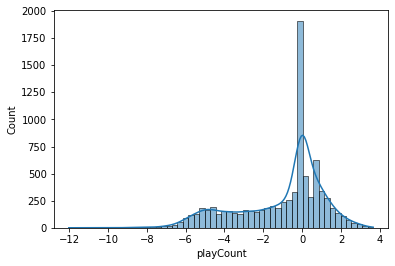

In [339]:
no_zeroes = streams_features[streams_features["playCount"]>0]
log_dist = np.log(no_zeroes["playCount"])
sns.histplot(data = log_dist, stat = "count", kde = True)

In [340]:
# fig, axs = plt.subplots(1,3,figsize=(12,5))
# sns.histplot(data = no_zeroes["playCount"], stat = "count", kde = True, ax = axs[0])
# sns.histplot(data = log_dist2, stat = "count", kde = True, ax = axs[1])
# sns.histplot(data = sqrt_dist, stat = "count", kde = True, ax = axs[2])

In [341]:
streams_features = streams_features[streams_features["playCount"]>0]
streams_features["playCount"] = np.log(no_zeroes["playCount"])

In [342]:
streams_features["playCount"].skew() #After  transformation

-0.8749866843482922

In [343]:
streams_features["playCount"].count()

8261

In [344]:
corr_matrix = streams_features.corr()
corr_matrix["playCount"].sort_values(ascending=False)

playCount           1.000000
minutesTotal        0.526831
acousticness        0.097492
instrumentalness    0.090120
mode                0.027259
key                 0.005380
liveness           -0.033157
duration           -0.034269
tempo              -0.037374
speechiness        -0.052993
valence            -0.053570
danceability       -0.078804
loudness           -0.104583
energy             -0.107722
Name: playCount, dtype: float64

<AxesSubplot:>

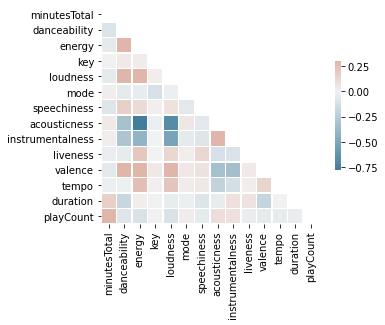

In [345]:
import numpy as np
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr_matrix, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [346]:
X = streams_features.drop(["artistName", "trackName", "minutesTotal", "trackId", "playCount"], axis = 1)
y = streams_features["playCount"]

In [347]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PowerTransformer
pt = PowerTransformer(method='yeo-johnson')
standard_scalar  = StandardScaler()
#min_max_scaler = MinMaxScaler()
X = min_max_scaler.fit_transform(X)
#X = pt.fit_transform(X)

In [320]:
# pt = PowerTransformer(method='yeo-johnson')
# data = pt.fit_transform(X)
# # convert the array back to a dataframe
# dataset = pd.DataFrame(data)
# # histograms of the variables
# dataset.hist()
# plt.show()

In [348]:
len(X)

8261

In [352]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42)

In [353]:
X_train, X_valid, y_train, y_valid = train_test_split(X_train,y_train, test_size=0.1, random_state=42)

In [354]:
X_lengths = {"X_train" : len(X_train), "X_test" : len(X_test), "X_valid" : len(X_valid)}
y_lengths = {"y_train" : len(y_train), "y_test" : len(y_test), "y_valid" : len(y_valid)}

In [355]:
X_lengths, y_lengths

({'X_train': 5947, 'X_test': 1653, 'X_valid': 661},
 {'y_train': 5947, 'y_test': 1653, 'y_valid': 661})

In [356]:
import tensorflow as tf
from tensorflow import keras

In [398]:
model_params = {
    "optimizer":keras.optimizers.Adam(
    learning_rate=0.00001, beta_1=0.9, beta_2=0.999, epsilon=1e-07, amsgrad=True,
    name='Adam'), 
    "loss": tf.keras.losses.MeanAbsoluteError(),
    "hidden_activation":"relu",
    "output_activation":"relu",  
    #"loss":keras.losses.Huber(), 
    "initializer" : tf.keras.initializers.HeNormal()
}

In [399]:
reduce_lr = keras.callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.75,
                              patience=2, min_lr=0.00001)

early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=8,min_delta = 0.0001)

In [400]:
model = keras.models.Sequential([
    keras.layers.Dense(50, activation=model_params["hidden_activation"], input_shape=X_train.shape[1:], 
                       kernel_initializer=model_params["initializer"]),
    #keras.layers.Dense(50, activation=model_params["hidden_activation"]),
    #keras.layers.Dense(30, activation=model_params["hidden_activation"]),
    #keras.layers.Dense(25, activation=model_params["hidden_activation"],kernel_initializer=model_params["initializer"]),
    keras.layers.Dense(20, activation=model_params["hidden_activation"],kernel_initializer=model_params["initializer"]),
    keras.layers.Dense(1, activation=model_params["output_activation"]),
])

model.compile(loss=model_params["loss"], 
              optimizer=model_params["optimizer"])

In [401]:
loss_min = {}
val_loss_min = {}
for i in [250]:
    history = model.fit(X_train, 
                    y_train, 
                    epochs=i, 
                    verbose = 1, 
                    validation_data=(X_valid, y_valid),
                    callbacks = [early_stopping, reduce_lr],
                    batch_size = 32)
    loss_min[i] = min(history.history["loss"])
    val_loss_min[i] = min(history.history["val_loss"])

Epoch 1/250
186/186 [==============================] - 1s 3ms/step - loss: 1.9263 - val_loss: 1.8620
Epoch 2/250
186/186 [==============================] - 0s 2ms/step - loss: 1.8757 - val_loss: 1.8153
Epoch 3/250
186/186 [==============================] - 0s 2ms/step - loss: 1.8321 - val_loss: 1.7738
Epoch 4/250
186/186 [==============================] - 0s 2ms/step - loss: 1.7936 - val_loss: 1.7373
Epoch 5/250
186/186 [==============================] - 0s 2ms/step - loss: 1.7609 - val_loss: 1.7074
Epoch 6/250
186/186 [==============================] - 0s 2ms/step - loss: 1.7349 - val_loss: 1.6860
Epoch 7/250
186/186 [==============================] - 0s 3ms/step - loss: 1.7155 - val_loss: 1.6704
Epoch 8/250
186/186 [==============================] - 0s 2ms/step - loss: 1.7009 - val_loss: 1.6585
Epoch 9/250
186/186 [==============================] - 0s 2ms/step - loss: 1.6904 - val_loss: 1.6497
Epoch 10/250
186/186 [==============================] - 0s 2ms/step - loss: 1.6832 - val_lo

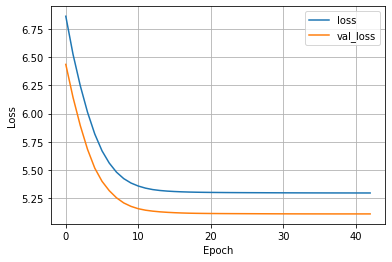

In [402]:
plot_loss(history, exp = True)

In [403]:
np.exp(model.evaluate(x = X_test,  y = y_test, verbose=1, batch_size = 16))

104/104 [==============================] - 0s 1ms/step - loss: 1.7092


5.524380839950555